In [1]:
#importing required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings 
warnings.simplefilter(action='ignore',category=FutureWarning)

In [2]:
!pip install xgboost

In [3]:
#  Importing dataset

fd = pd.read_csv(r"C:\Users\SREEDHAR\Documents\Data science\ML projects\Flight_Ticket_Participant_Datasets\Data_Train1.csv")
fd

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
#Using shape function to get total number of rows and columns
fd.shape

(10683, 11)

In [5]:
#printing column names
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
#There is one column with numeric data and 10 other columns with objective data

In [7]:
for column in fd:
    if np.dtype(fd[column])=='O':
        print(fd[column].value_counts())
        
    else:
        continue

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156


In [8]:
#checking for missing values in dataset
fd.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
# two rows has null values, hence dropping/removing from set
fd.dropna( axis=0, how="any", thresh=None, subset=None, inplace=True)

In [10]:
#checking null values again
fd.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

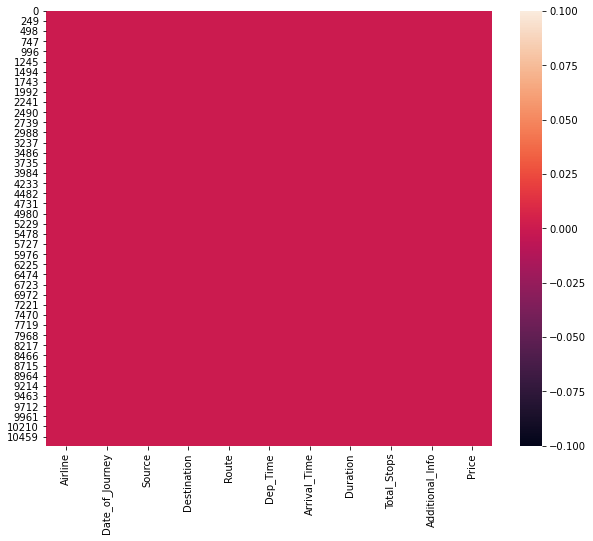

In [11]:
#heatmap showing any null values
plt.figure(figsize = (10,8))
sns.heatmap(fd.isnull())
plt.show()

In [12]:
#checking duplicates
fd.duplicated().sum()

220

In [13]:
#dropping allthe duplicates
fd.drop_duplicates()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [14]:
fd['Day_of_Journey'] = pd.to_datetime(fd.Date_of_Journey, format = '%d/%m/%Y').dt.day
fd['Month_of_Journey'] = pd.to_datetime(fd.Date_of_Journey, format = '%d/%m/%Y').dt.month
fd['Dep_hour'] = pd.to_datetime(fd.Dep_Time).dt.hour
fd['Dep_min'] = pd.to_datetime(fd.Dep_Time).dt.minute
fd['Arrival_hour'] = pd.to_datetime(fd.Arrival_Time).dt.hour
fd['Arrival_min'] = pd.to_datetime(fd.Arrival_Time).dt.minute

In [15]:
#dropping the columns and printing top5 rows
fd.drop(columns=['Date_of_Journey','Dep_Time','Arrival_Time'], inplace = True)
fd.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [16]:
duration = list(fd.Duration)

for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i]= duration[i].strip() + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]
            
            

duration_hour=[]
duration_minute = []

for i in range (len(duration)):
    duration_hour.append(int(duration[i].split(sep='h')[0]))
    duration_minute.append(int(duration[i].split(sep = 'm')[0].split()[-1]))

fd['Duration_hours'] = duration_hour
fd['Duration_mins']= duration_minute

In [17]:
fd.drop('Duration',axis = 1 , inplace = True)

In [18]:
#checking values from Destination column
fd['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [19]:
#replacing New delhi cells with Delhi 
fd['Destination']=fd['Destination'].replace('New Delhi','Delhi')
fd.head(5)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,BLR ? DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


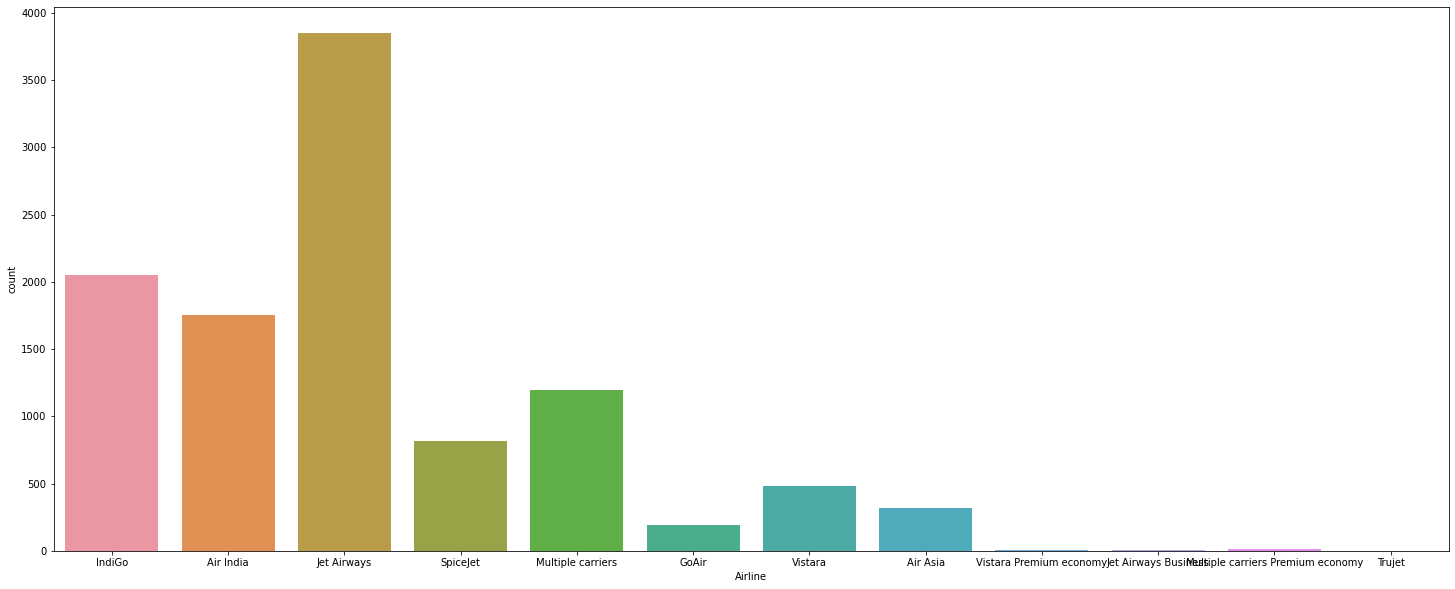

In [20]:
#plots showing the graph of all airlines used 
plt.figure(figsize = (25,10))
sns.countplot(x = 'Airline', data = fd)
plt.show()

In [21]:
#most of the airines used is jet airways, indigo and air india

<AxesSubplot:xlabel='Airline', ylabel='Price'>

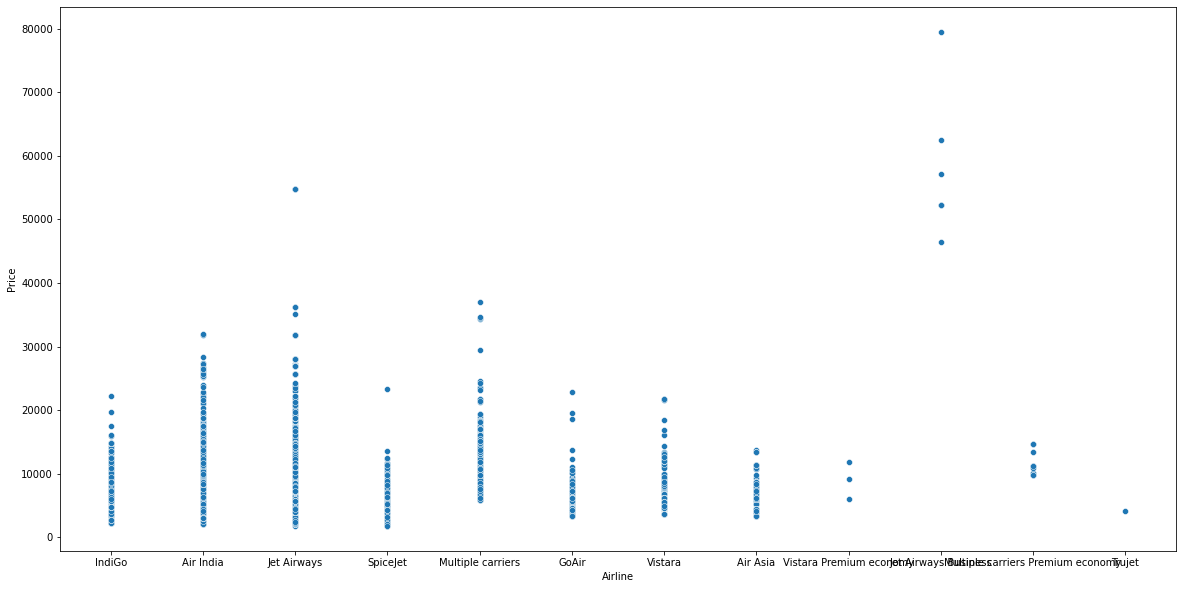

In [22]:
#price range scatterplots of each airlines
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'Airline', y = 'Price', data = fd)

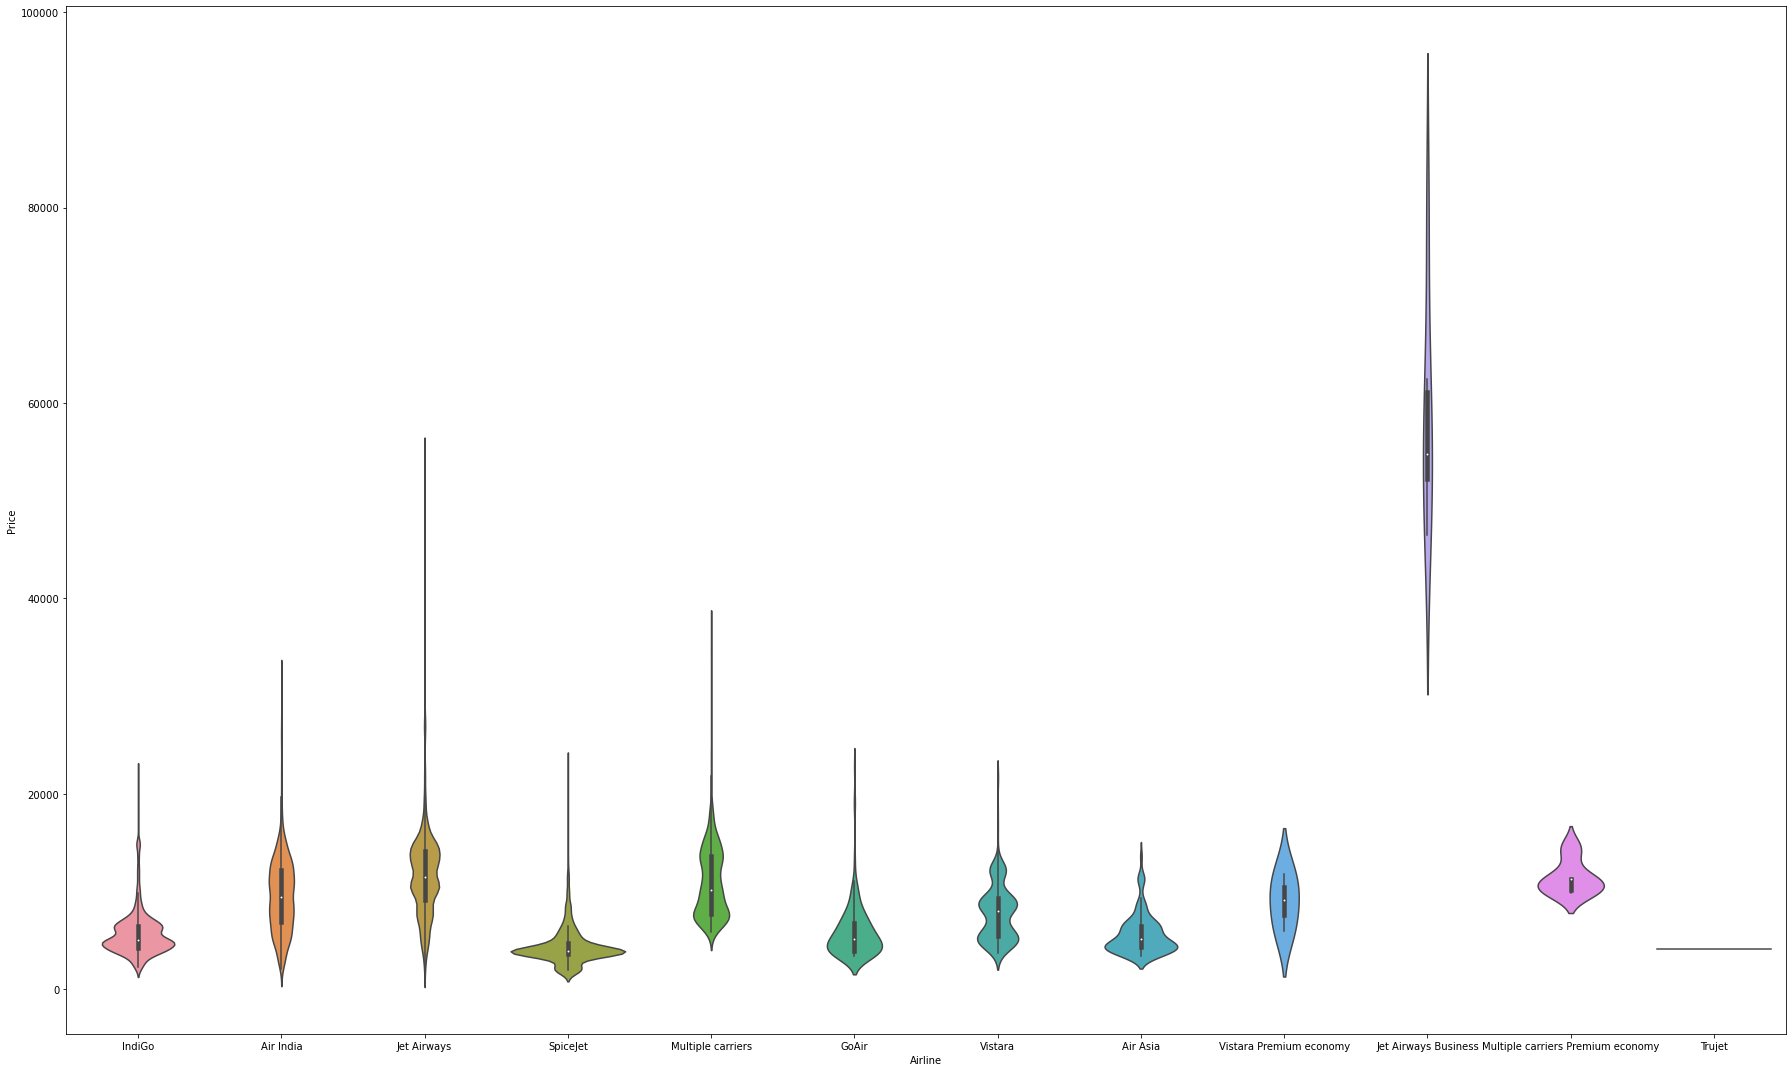

In [23]:
#violinplot for the same 
plt.figure(figsize = (25,15))
sns.violinplot(x = 'Airline', y = 'Price', data = fd)
plt.tight_layout()

In [24]:
#jet airways business has the higest ticket pricing and spicejets, air india and jet airways has the lowest prices

In [25]:
#checking values from source column
fd['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

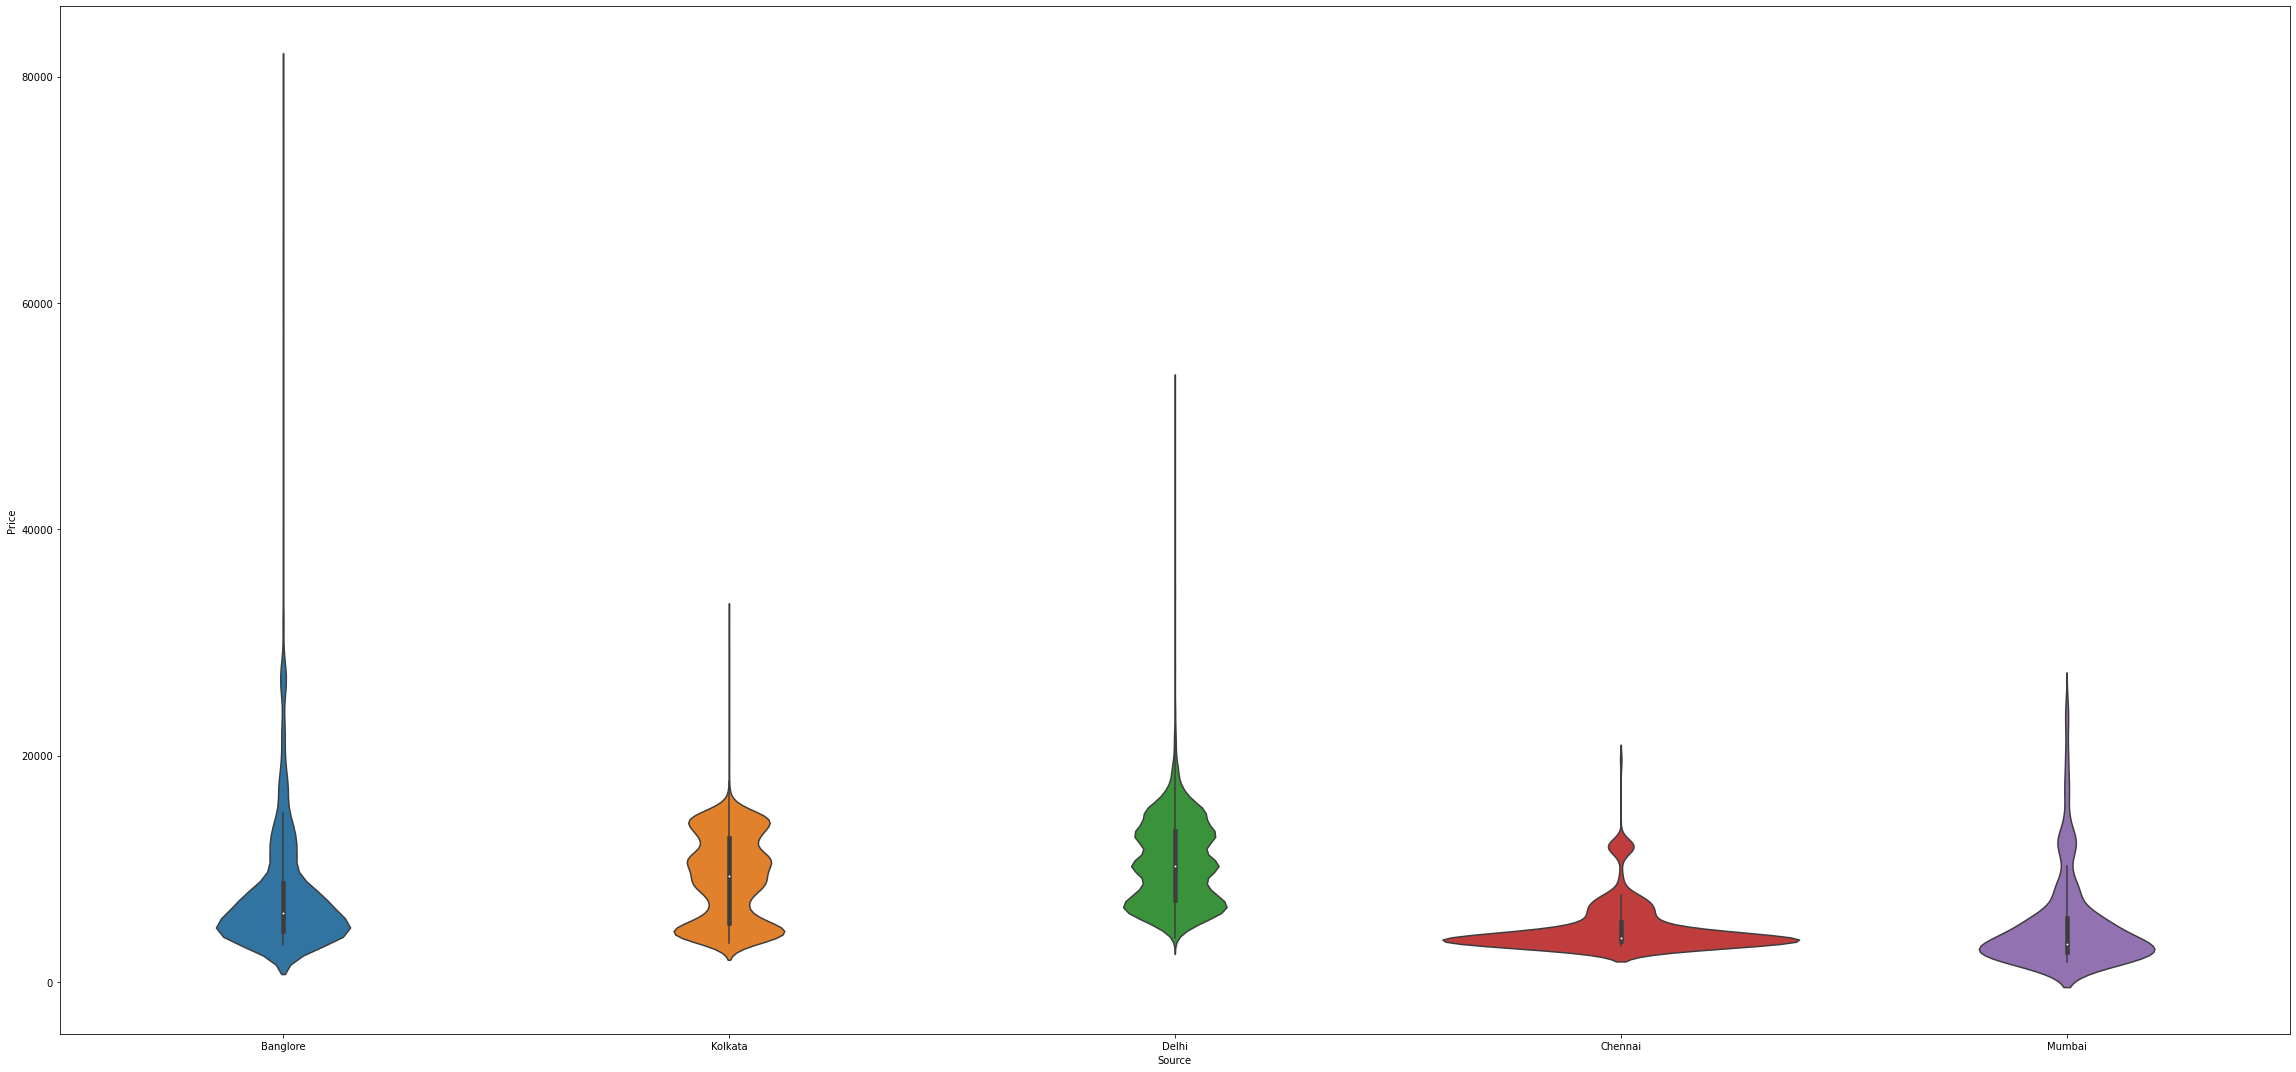

In [26]:
#Data showing the the source airports and price ranges
plt.figure(figsize = (32,15))
sns.violinplot(x = 'Source', y = 'Price', data = fd)
plt.tight_layout()

In [27]:
#banglore is the highest source number of flights and price ranges and chennai stays at the bottom

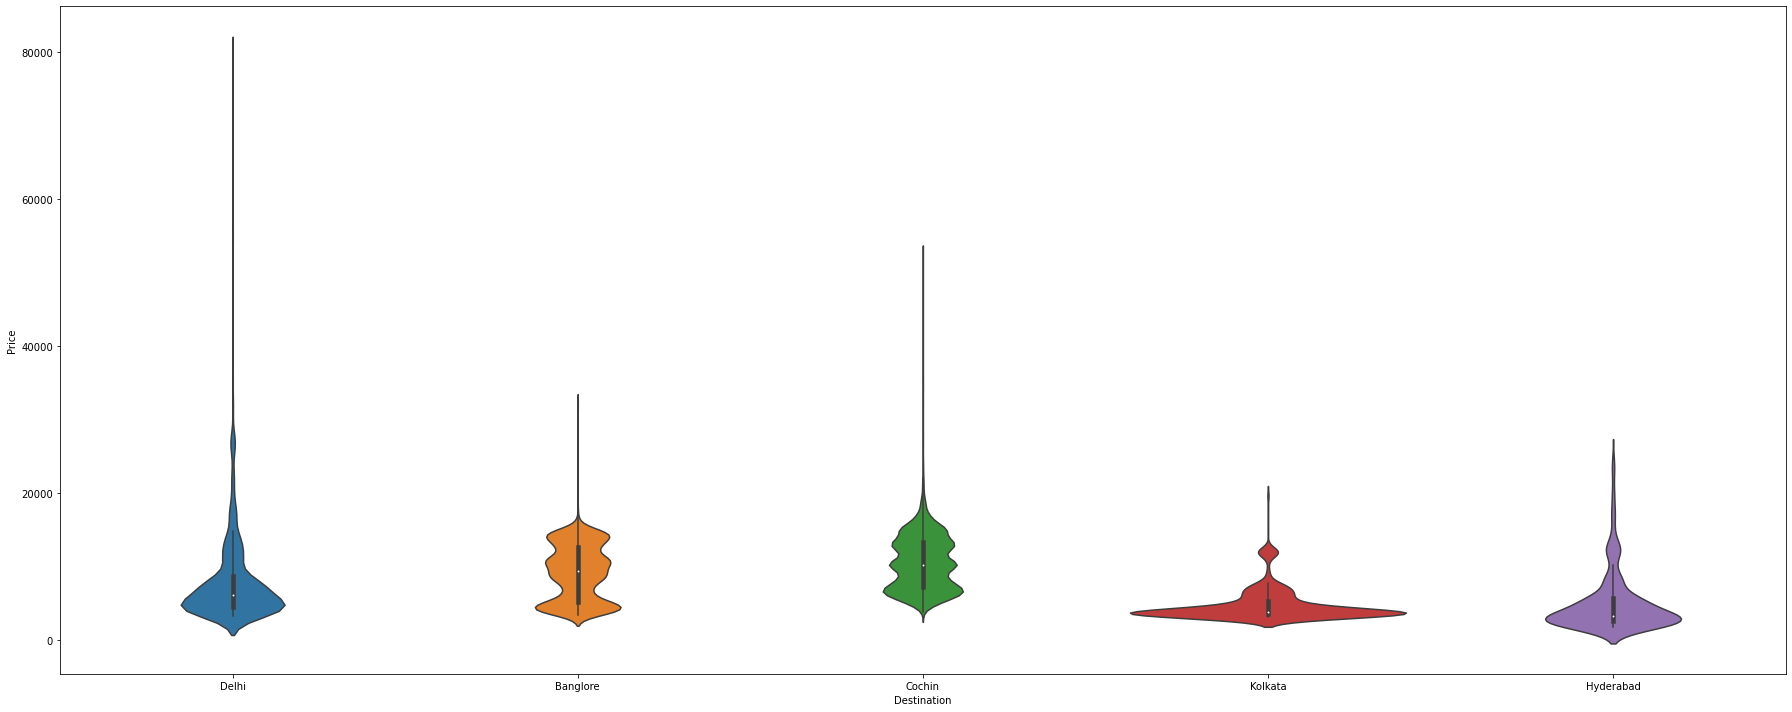

In [28]:
#plots with destination airports and price ranges
plt.figure(figsize = (25,10))
sns.violinplot(x = 'Destination', y = 'Price', data = fd)
plt.tight_layout()

In [29]:
#delhi stays at top with destination airports and higher prices. Kolkata stays last

<AxesSubplot:xlabel='Source', ylabel='count'>

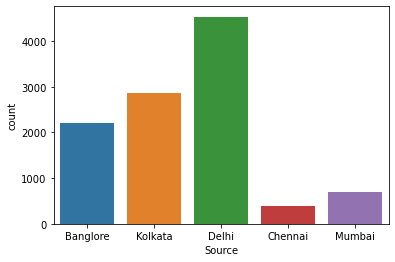

In [30]:
#data of flights from source
sns.countplot('Source', data = fd)

<AxesSubplot:xlabel='Destination', ylabel='count'>

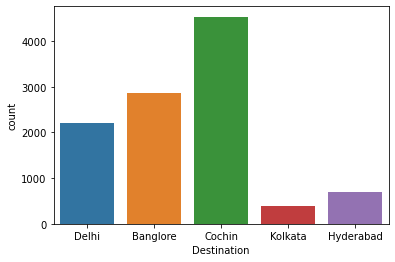

In [31]:
#data of flights to destination
sns.countplot('Destination', data = fd)

In [32]:
#flights leaving delhi are more and least from chennai. 
#flights reaching cochin are more and least to kolkata

In [33]:
#Dropping route and additional info columns
fd.drop(['Route', 'Additional_Info'], axis =1 , inplace = True) 
fd

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1 stop,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,Delhi,non-stop,12648,1,3,11,30,14,10,2,40


In [34]:
#values from total stops columns
fd['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [35]:
#replacing number of stops with integers
fd['Total_Stops'] = fd['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [36]:
fd['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

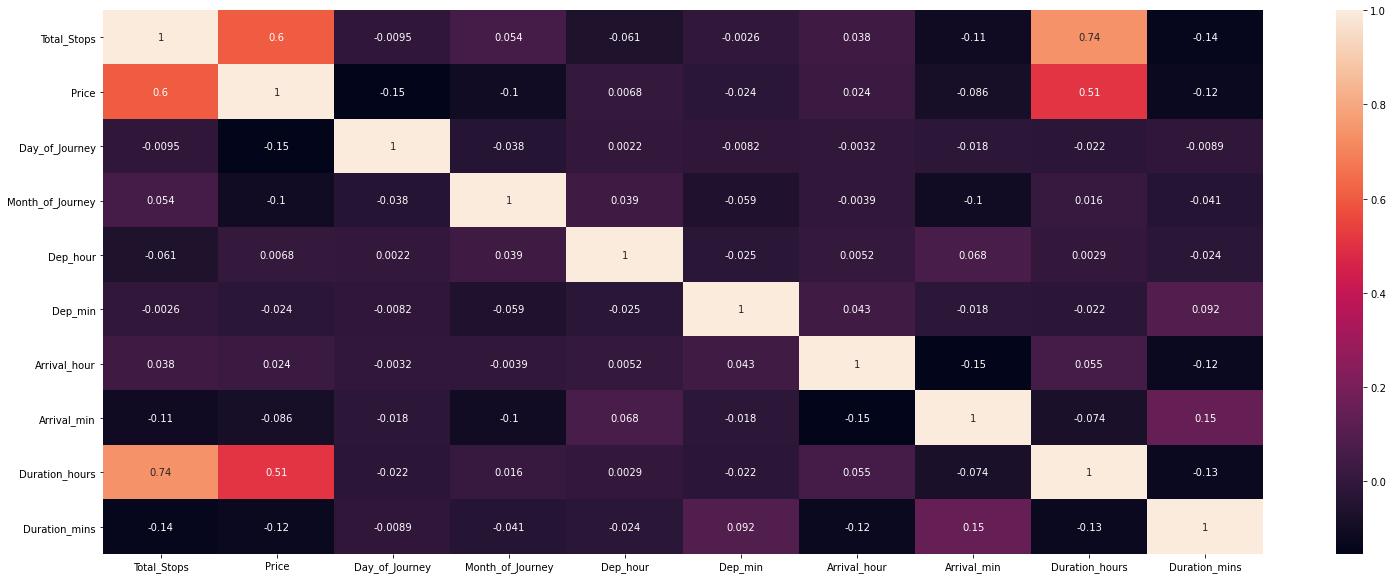

In [37]:
#heatmap analysis
plt.figure(figsize = (26,10))
sns.heatmap(fd.corr(), annot = True)
plt.show()

In [38]:
#Heat map analysis shows that the target column is highly correlated with the Duration hours and Total number of stops

In [39]:
def add_column_prefix (fd, column, prefix):
    return fd[column].apply(lambda x: prefix + str(x))

fd['Destination'] = add_column_prefix(fd,'Destination', 'Dest_' )
fd['Source'] = add_column_prefix(fd,'Source', 'Sour_' )

In [40]:
def onehot_encoder(fd, columns):
    for column in columns:
        dummies = pd.get_dummies(fd[column])
        fd = pd.concat([fd, dummies], axis = 1)
        fd.drop(column, axis = 1 , inplace = True)
        
    return fd

In [41]:
cat_feat = ['Airline','Source','Destination',]

fd = onehot_encoder(fd,cat_feat )
fd

,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Sour_Banglore,Sour_Chennai,Sour_Delhi,Sour_Kolkata,Sour_Mumbai,Dest_Banglore,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata
0,0,3897,24,3,22,20,1,10,2,50,...,1,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,1,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,0,1,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,1,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,...,0,0,0,1,0,1,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,...,0,0,0,1,0,1,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,...,1,0,0,0,0,0,0,1,0,0
10681,0,12648,1,3,11,30,14,10,2,40,...,1,0,0,0,0,0,0,1,0,0


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

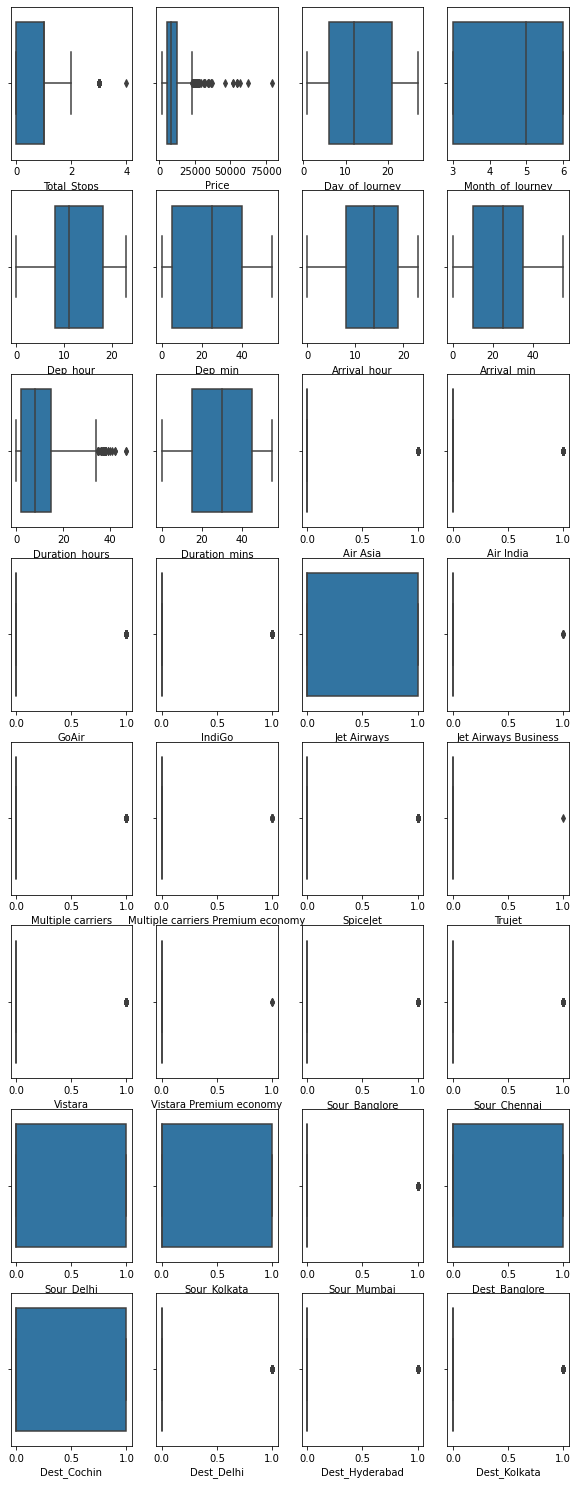

In [42]:
plt.figure(figsize = (10,40))

plotno = 1

for column in fd:
    if plotno<=32:
        ax = plt.subplot(12,4,plotno)
        sns.boxplot(fd[column], orient = "V")
        plt.xlabel(column)
        
    plotno +=1
    
plt.tight_layout
plt.tight_layout

In [43]:
#outliers exist in price and duration hours columns. Removing the same.

In [44]:
fd.shape

(10682, 32)

In [45]:
# Using Z-score to Remove Outliers

from scipy.stats import zscore

z_score = zscore(fd[['Price', 'Duration_hours']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1)

fd= fd[filtering_entry]
fd.shape

(10521, 32)

In [46]:
# Checking the lost data

print ('percentage of Data lost is = ', ((10682-10521)/10682)*100 , '%')

percentage of Data lost is =  1.507208387942333 %


In [47]:
fd

,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Sour_Banglore,Sour_Chennai,Sour_Delhi,Sour_Kolkata,Sour_Mumbai,Dest_Banglore,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata
0,0,3897,24,3,22,20,1,10,2,50,...,1,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,1,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,0,1,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,1,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,...,0,0,0,1,0,1,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,...,0,0,0,1,0,1,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,...,1,0,0,0,0,0,0,1,0,0
10681,0,12648,1,3,11,30,14,10,2,40,...,1,0,0,0,0,0,0,1,0,0


In [48]:
x = fd.drop('Price', axis = 1)
y = fd['Price']

In [49]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10521, dtype: int64

In [50]:
# Using RobustScaler for Data Scaling
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [51]:
x

,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air Asia,...,Sour_Banglore,Sour_Chennai,Sour_Delhi,Sour_Kolkata,Sour_Mumbai,Dest_Banglore,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata
0,-1.0,0.800000,-1.0,1.1,-0.142857,-1.181818,-0.6,-0.461538,0.666667,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,-0.733333,0.0,-0.6,0.714286,-0.090909,-0.4,-0.076923,-0.166667,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,-0.200000,0.5,-0.2,0.000000,-0.909091,0.0,0.846154,-1.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.7,-0.571429,0.818182,0.2,-0.230769,-0.166667,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,-0.733333,-1.0,0.5,0.714286,0.636364,0.4,-0.307692,0.500000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10516,-1.0,-0.200000,-0.5,0.8,0.857143,0.727273,0.0,-0.461538,0.000000,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
10517,-1.0,1.000000,-0.5,0.9,0.571429,0.818182,-0.2,-0.461538,0.166667,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
10518,-1.0,1.000000,-0.5,-0.3,-0.142857,-0.272727,-0.2,-0.384615,-1.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10519,-1.0,-0.733333,-1.0,0.0,0.142857,0.000000,-0.6,-0.461538,0.333333,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [52]:
# Importing Linear Regression model for getting best random state 
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [53]:
maxr2 = 0
maxRS=0

for i in range(0,500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    predf=LR.predict(x_test)
    r2_sc = r2_score(y_test, predf)
    
    if r2_sc>maxr2:
        maxr2=r2_sc
        macRS = i
print('Best R2score=',maxr2, "Random state=",macRS) 

Best R2score= 0.6662943973610245 Random state= 345


In [54]:
# Splitting data into training and testing dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=358)

In [55]:
y_train

2988      4423
796       7229
8510     12898
4875      7742
9855      3383
         ...  
433       5198
9151     10844
10526    10368
4667     11668
3844     10197
Name: Price, Length: 7890, dtype: int64

In [56]:
# Going for Linear Regression model
LN = LinearRegression()

LN.fit(x_train,y_train)
predf=LN.predict(x_test)
r2_sc = r2_score(y_test, predf)
r2_sc

0.6219962757580921

In [57]:
# Analysis with KNN model
from sklearn.neighbors import KNeighborsRegressor
KR = KNeighborsRegressor()
KR.fit(x_train,y_train)

predf=KR.predict(x_test)
r2_sc = r2_score(y_test, predf)
r2_sc

0.7808206731774203

In [58]:
# Going for DecissionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

DR =  DecisionTreeRegressor()

DR.fit(x_train,y_train)

predf=DR.predict(x_test)
r2_sc = r2_score(y_test, predf)
r2_sc

0.7102366968209612

In [59]:
# going for AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
AR =  AdaBoostRegressor()
AR.fit(x_train,y_train)

predf=AR.predict(x_test)
r2_sc = r2_score(y_test, predf)
r2_sc

0.6309871745594491

In [60]:
# Checking with RandomForest
from sklearn.ensemble import RandomForestRegressor
RR = RandomForestRegressor()

RR.fit(x_train,y_train)

predf=RR.predict(x_test)
r2_sc = r2_score(y_test, predf)
r2_sc

0.8216164757838185

In [61]:
import xgboost as xg
xg= xg.XGBRegressor()
xg.fit(x_train,y_train)
predf=xg.predict(x_test)
r2_sc = r2_score(y_test, predf)
r2_sc

0.8558953298112058

In [62]:
#printing all the mean values
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LN, x,y, cv=5)
print("Cross validation score for Linear Regression is", scr.mean())

scr = cross_val_score(KR, x,y, cv=5)
print("Cross validation score for KNN is", scr.mean())


scr = cross_val_score(DR, x,y, cv=5)
print("Cross validation score for DecisionTreeRegressor is", scr.mean())

scr = cross_val_score(RR, x,y, cv=5)
print("Cross validation score for Random Forest Regressor is", scr.mean())

scr = cross_val_score(AR, x,y, cv=5)
print("Cross validation score for ADA boost Regressor is", scr.mean())

scr = cross_val_score(xg, x,y, cv=5)
print("Cross validation score for XG Boost Regressor is", scr.mean())

Cross validation score for Linear Regression is -1.0070998754624588e+19
Cross validation score for KNN is 0.7660892386942614
Cross validation score for DecisionTreeRegressor is 0.7120732873537965
Cross validation score for Random Forest Regressor is 0.81566917264881
Cross validation score for ADA boost Regressor is 0.6221443311523227
Cross validation score for XG Boost Regressor is 0.8547777326030239


In [63]:
#Since best r2 score is from XGboost Regressor, Tuning parameter for xgboost

In [64]:
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor

In [65]:
from sklearn.model_selection import GridSearchCV
param_tuning = {
        'learning_rate': [0.1,1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [0.5,1, 3, 5],
        'subsample': [0.3,0.5 ,0.7],
        'colsample_bytree': [0.3,0.5, 0.7],
        'n_estimators' : [200, 500,],
        'objective': ['reg:squarederror']
    }

In [66]:
xgb_model = XGBRegressor()

gsearch = GridSearchCV(estimator = xgb_model, param_grid = param_tuning,cv = 5,n_jobs = -1,verbose = 1)


gsearch.fit(x_train,y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    val

In [67]:
gsearch.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 0.5,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [68]:
xgb_model = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.5,
        learning_rate = 0.1,
        max_depth = 5,
        min_child_weight = 1,
        n_estimators = 500,
        subsample = 0.7)

In [69]:
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
y_pred = xgb_model.predict(x_test)

In [71]:
print('r2-score is:',r2_score(y_pred,y_test))

r2-score is: 0.8386152042886886


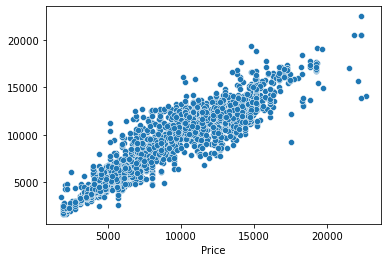

In [72]:
 # Checking predicted vs Actual
sns.scatterplot(y_test, y_pred)
plt.show()

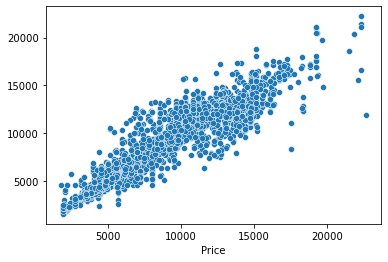

In [73]:
 # Checking predicted vs Actual
sns.scatterplot(y_test,  predf)
plt.show()

In [74]:
#XGB model was performing better before tuning,hence saving the XGB model

In [76]:
import joblib
joblib.dump(xg,'Flight_Price_Prediction.pkl')

['Flight_Price_Prediction.pkl']